# Customer Segmentation and Analysis

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Description and Objective

We will be working on a Dataset about the customers of a mall with their respective information. Our goal here is to use different clustering techniques in order to figure out information about customers

## Data Exploration

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df = df.drop('CustomerID', axis=1)

## Feature Exploration

**CustomerID**: Numeric, the ID of the customer
    
**Gender**: Object, the gender of the customer

**Age**: Numeric, the customer’s age

**Annual Income (k$)**: Numeric, the customer’s yearly income

**Spending Score (1-100)**: Numeric, the number between 1-100 which states how much they spend on the mall

## Data Visualization

In [9]:
plt.style.use('fivethirtyeight')

Distribution Histograms

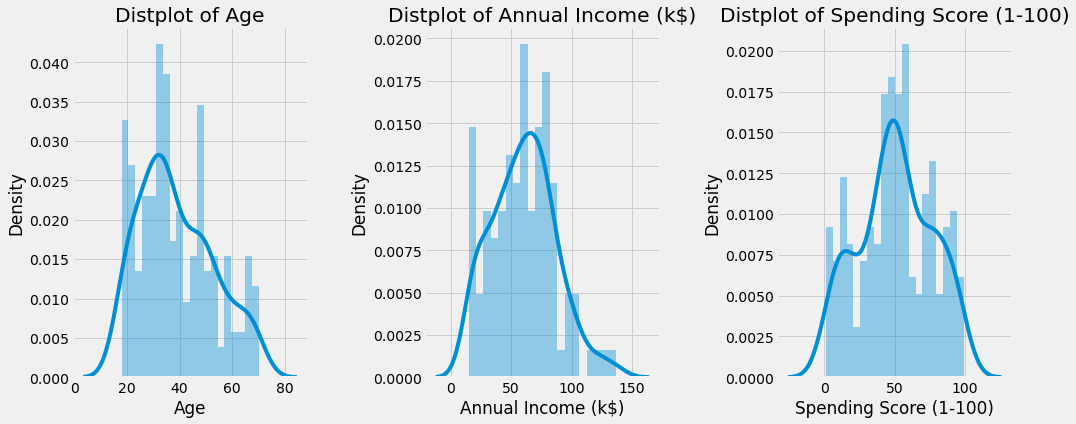

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Countplot per Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

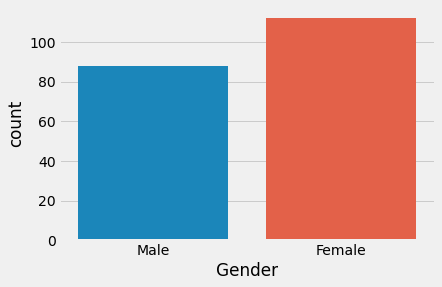

In [11]:
sns.countplot(data=df, x='Gender')

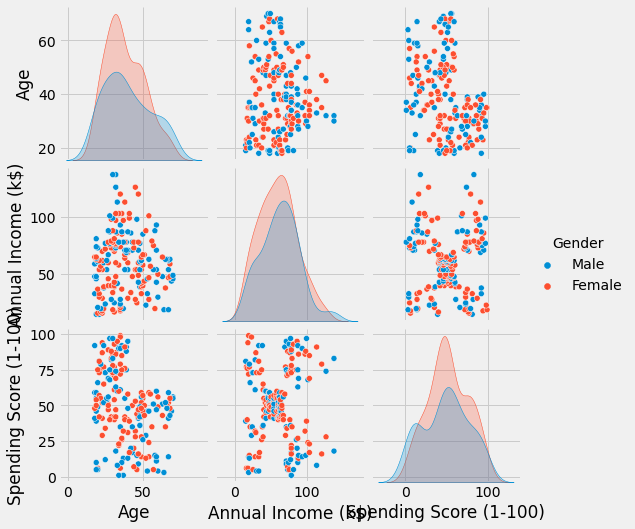

In [12]:
sns.pairplot(df, hue='Gender')

We checked above all the relation between the variables. The most relevant may be Age vs Annual Income and specially, Annual Income vs Spending Score, which seems to be divided in some groups

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

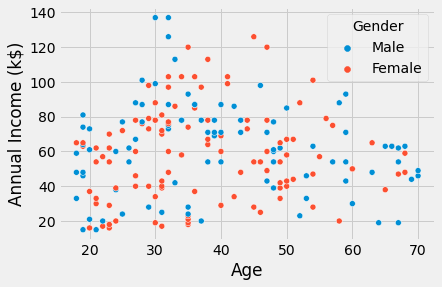

In [13]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

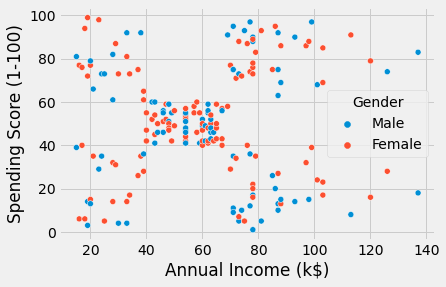

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

In [15]:
data = pd.get_dummies(df, drop_first= True)

In [16]:
data.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Male               uint8
dtype: object

## Scaling Features

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
float_columns = [x for x in data.columns]

In [20]:
float_columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']

In [21]:
data[float_columns] = sc.fit_transform(data[float_columns])

In [22]:
data.head(4)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405


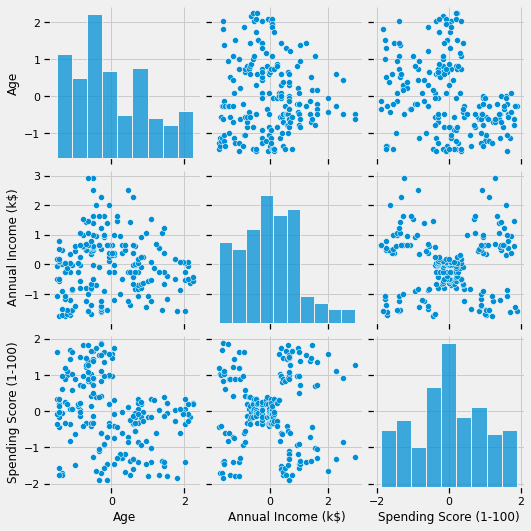

In [23]:
sns.set_context('notebook')
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]);

## K-Means Clustering

For this Clustering, we will exclusively work on the segmentation using Annual Income and Spending Score, where we recognized above that there may be different groups

In [24]:
from sklearn.cluster import KMeans

In [25]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[['Annual Income (k$)' , 'Spending Score (1-100)']])

In [26]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[['Annual Income (k$)' , 'Spending Score (1-100)']])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

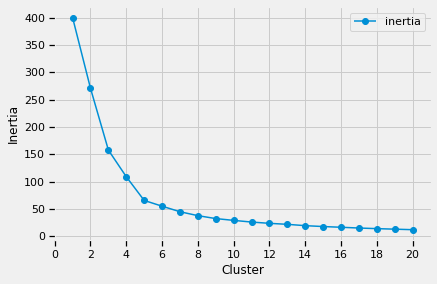

In [27]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

#### As we see above, the optimal value of clusters should be 5 per the Elbow Method

In [28]:
X = data[['Annual Income (k$)' , 'Spending Score (1-100)']]

In [29]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans = kmeans.fit(data[['Annual Income (k$)' , 'Spending Score (1-100)']])

In [30]:
labels = kmeans.fit_predict(data[['Annual Income (k$)' , 'Spending Score (1-100)']])

In [31]:
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

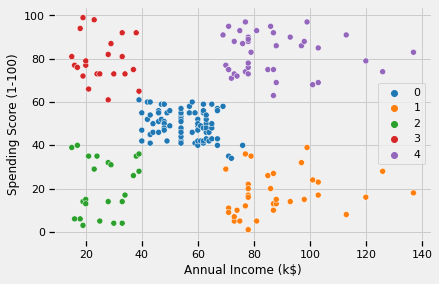

In [32]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, palette='tab10')

We see on the above chart, that the 5 clusters seem to be a great number for this analysis

Let´s assume that those 5 are our customer clusters in order to make a promotion. We whould classify them as follows:

- Red: Low annual income and high spending score. They seem to be compulsive buyiers
- Green: Low annual income with low spending score.
- Purple: High Annual income with high spending score. They seem to be people of the high society who use to buy a lot
- Orange: High annual income with low spending score. They are those people who have income but not use to spend much on the mall
- Blue: They are the mid annual income with mid spending score

If we have to make a promotion, we should focus on the ones in orange probably, in order to make an offer which attracs them to the mall, since they have money to spend.

In [33]:
data['KMeansCluster'] = labels

In [34]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,KMeansCluster
0,-1.424569,-1.738999,-0.434801,1.128152,2
1,-1.281035,-1.738999,1.195704,1.128152,3
2,-1.352802,-1.700830,-1.715913,-0.886405,2
3,-1.137502,-1.700830,1.040418,-0.886405,3
4,-0.563369,-1.662660,-0.395980,-0.886405,2
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405,4
196,0.441365,2.497807,-0.861839,-0.886405,1
197,-0.491602,2.497807,0.923953,1.128152,4
198,-0.491602,2.917671,-1.250054,1.128152,1


## Agglomerative Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
X = data[['Annual Income (k$)' , 'Spending Score (1-100)']]

In [37]:
ag = AgglomerativeClustering(n_clusters=5, linkage='ward')
ag = ag.fit(X)

In [38]:
data['agglom'] = ag.fit_predict(X)

Text(0.5, 1.0, 'Agglomerative with 5 Clusters')

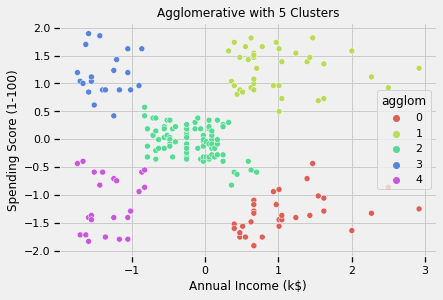

In [39]:
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['agglom'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')

In [40]:
X['Labels'] = ag.labels_

In [41]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix 

In [42]:
dist = distance_matrix(X, X)

In [43]:
Z = hierarchy.linkage(dist, 'complete')

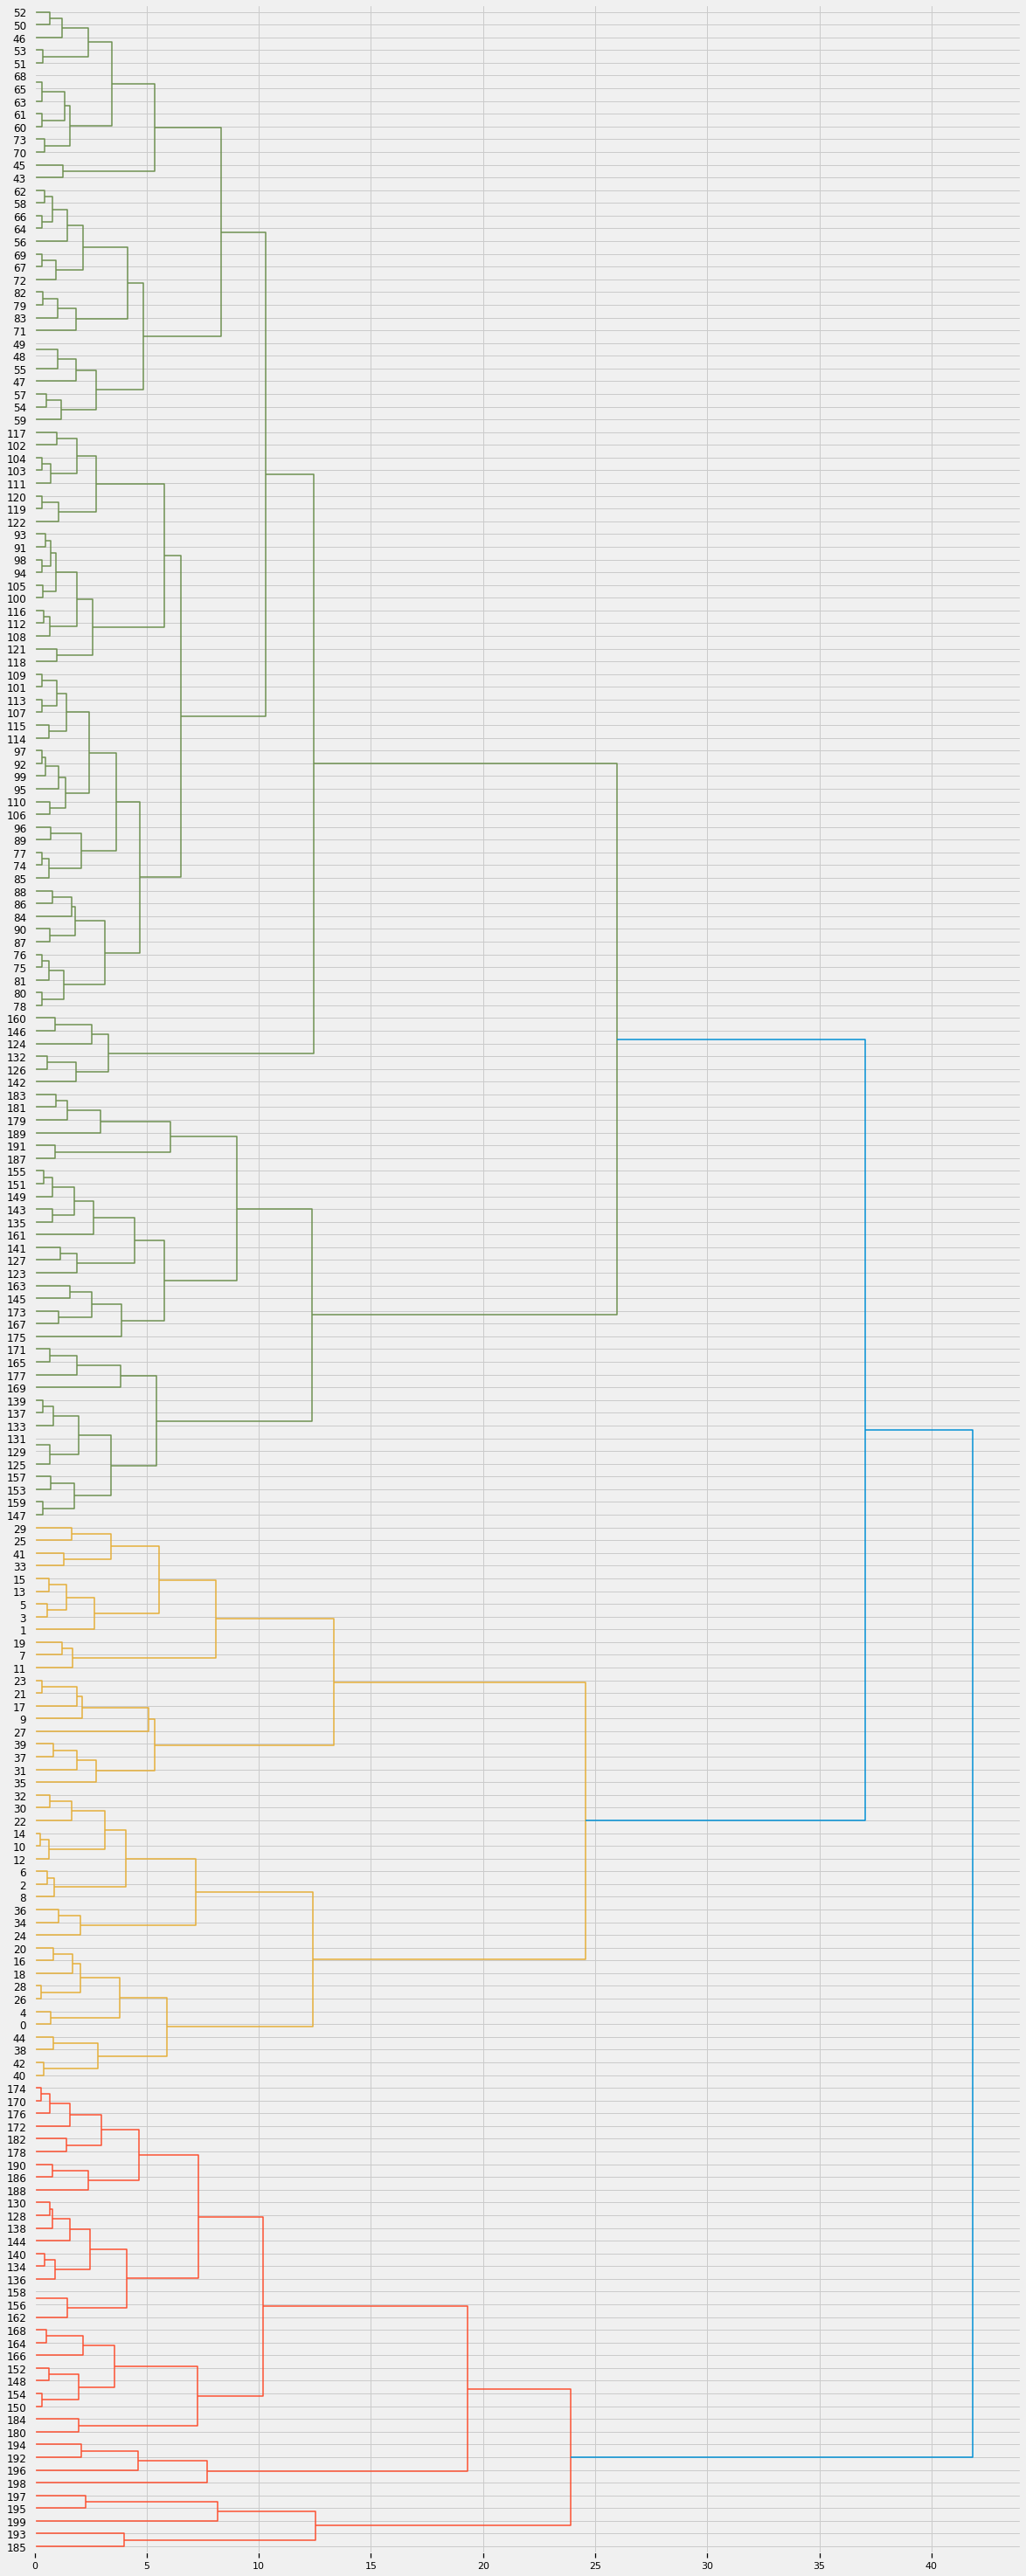

In [44]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

We used complete linkage for our case, let's change it to average linkage to see how the dendogram changes.

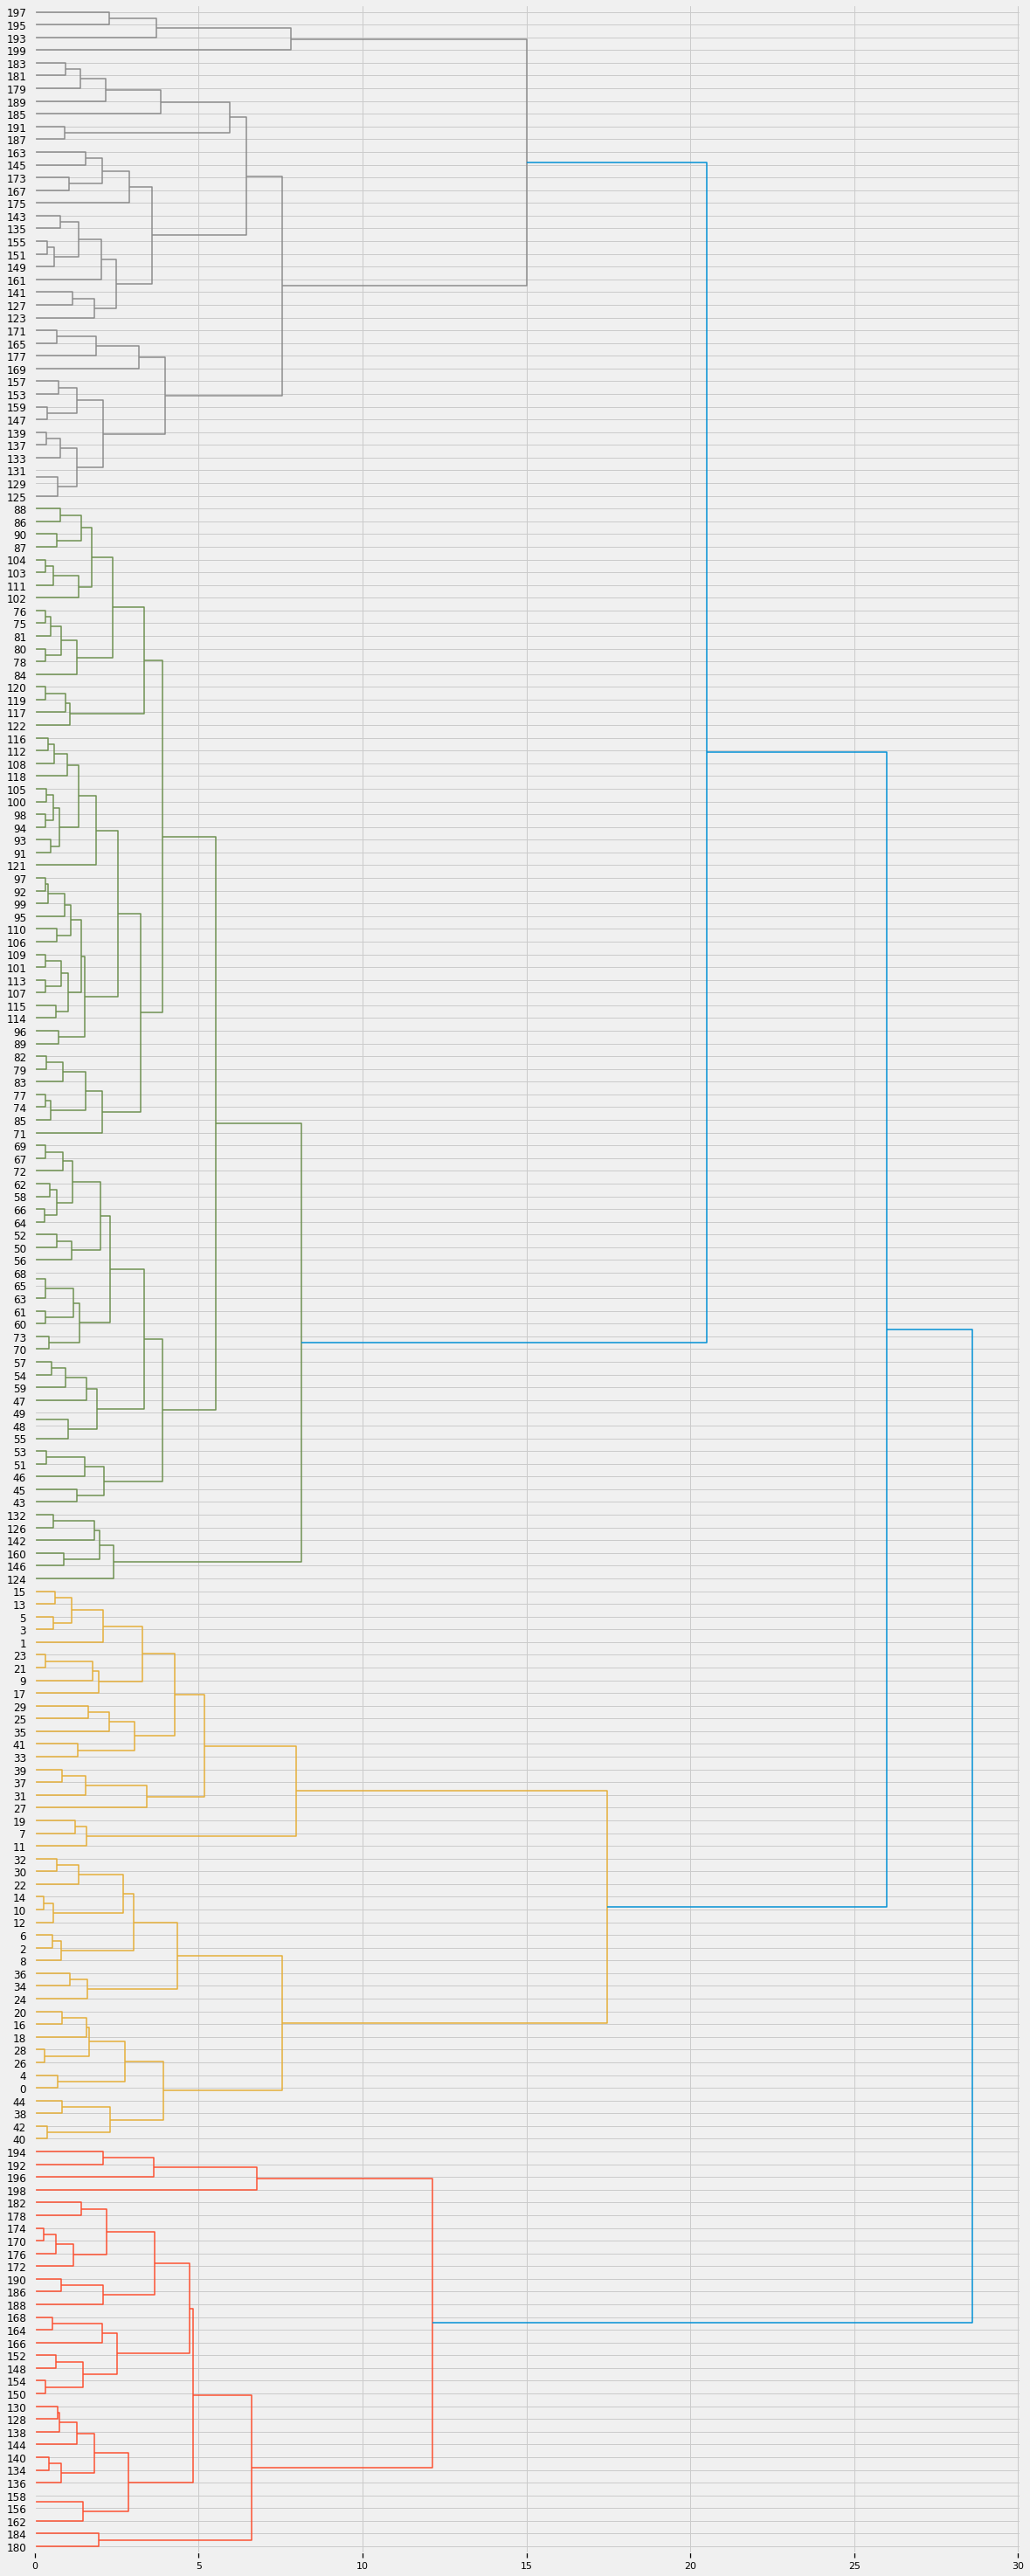

In [45]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Density Based Clustering (DBSCAN)

In [65]:
W = df.drop(['Gender'], axis=1)

In [69]:
W.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [71]:
X.head()

,Annual Income (k$),Spending Score (1-100),Labels
0,-1.738999,-0.434801,-1
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,-1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,-1


In [67]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(W)

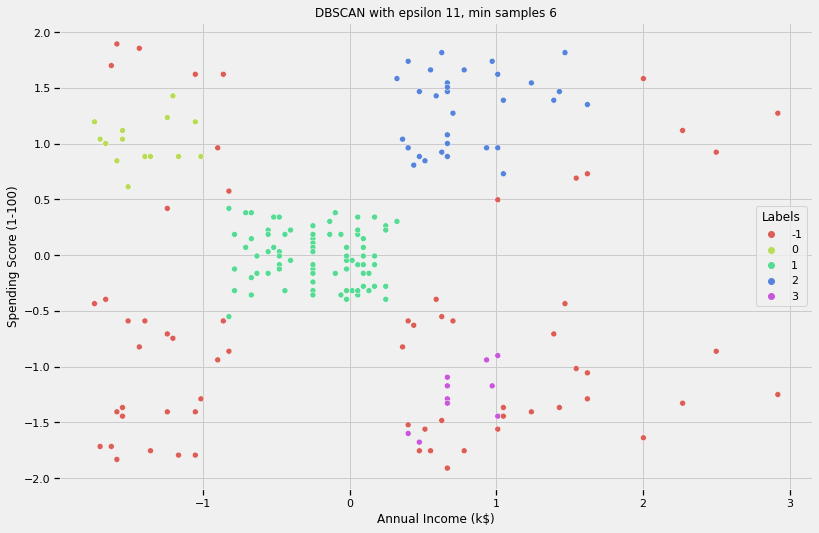

In [72]:
X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
               palette=sns.color_palette('hls', 5))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

As we may see above, the model does not work good here. There are many points categorized as -1, which means that they are considered outliers. DBSCAN doesn't perform very well because the density in our data is not that strong. We may have performed better if we had a larger dataset

## Conclusions

Regarding the models we have applied, the best one is K-Means since it very simple and interpretable. Agglomerative clustering also works good, and DBSCAN is not a good model since the low number of observations on our dataset, which makes this last model to interpretate lot of points as outliers. 

We have identified 5 important clusters, we may now have to define what is our objective on the analysis. For example, if we are aiming to increase our sales, we should make a marketing campaign to cluster with high income and low spending score, since they have money to spend but maybe they are not attracted by the mall

Also, as next steps, we may have to also apply different techniques like Mean-Shift, etc in order to compare more models. Besides this, I think that the most important next step for this dataset should be to obtain more observations, since it only had 200, in order to have better and more data for our analysis.